#**Week 1 - PyTorch and MLPs** (~1 hr total)



## Part 0 - Setup (~1 min)

**Before you begin, please clone this notebook!**

*File > Save a copy in Drive*

Then, go to the `DLE-Jun23` Drive [folder link](https://drive.google.com/drive/folders/1RytzIRRahly0MO9IzRXMimIgSP02DQnx), click the down arrow next to DLE-Jun23, and select "Add shortcut to Drive". Make sure the shortcut is added to "My Drive".

<img src="https://drive.google.com/uc?export=download&id=1y2OCLuw7Ux2h10HQSVpT0s5c2k1JPGS-"  width="300">

In [1]:
from logging import exception
#@title Step 1: Mount drive
#@markdown Run this cell. If prompted, press "Connect to Google Drive" and select your Google account.
#@markdown Then, under the folder icon 📁 on the left panel, you should see the folder **drive** appear.
from google.colab import drive
from IPython.display import display, Markdown, HTML
import os, sys

%load_ext autoreload
%autoreload 2
try:
  drive.mount('/content/drive', force_remount=False)
  sys.path.append('/content/drive/MyDrive/DLE-Jun23/Projects')
  os.chdir('/content/drive/MyDrive/Colab Notebooks/CoRise_DL')
  display("⭐ Mounted successfully!")
except:
  display(HTML('<span style="color:red">An error occurred. Try again!</span>'))


Mounted at /content/drive


'⭐ Mounted successfully!'

### Step 2: Import packages

In [2]:
%%capture

%load_ext autoreload
%autoreload 2

!pip install gradio
from dle_utils.dle_utils import *

import gradio as gr
import torch
import torch.nn as nn
import numpy as np
np.random.seed(0)
torch.manual_seed(0)

In [ ]:
#@title Step 3: Enter your name to begin
#@markdown Enter your name as it appears in Slack and run this cell! (Optional; this allows us gain insight into your progress. You can also leave this blank.)
Name = '' #@param {type:"string"}
filepath = '/content/drive/MyDrive/Colab Notebooks/dle_info.txt'
if os.path.exists(filepath):
  print("Success!")
else:
  if len(Name) == 0:
    print("Please set your name!")
  else:
    try:
      with open(filepath, 'w') as fp:
        fp.write(Name)
        dle_username = Name
      print("Success!")
    except:
      print("Something went wrong...")


**Note**: Most cells contains a `check` function that provides feedback on your solution (correct or incorrect). We've designed these for your benefit to know that you are on the right track! Even if you are stuck on one section, we encourage you to continue as a failed check does not prevent you from continuing. Though we have worked to make each check as comprehensive as possible, PyTorch may from time to time have unexpected random behaviors. Please reach out to the instructors if you think your answer should be passing a check!

# Part 1 - PyTorch Basics (~30 min)

## *Tensor < Layer < Network*

In PyTorch, a **tensor** is the fundamental data structure for storing and manipulating data, a **layer** is a neural network component that performs a specific computation on the input tensors and produces output tensors, and a **network** (also known as a model) is a collection of layers that are organized in a specific way to perform a specific task, such as image classification or machine translation.


## Step 1: Tensors

PyTorch has its own classes for arrays and data, similar to how Numpy has objects like np.array. In order to perform PyTorch operations, we just to convert data into a PyTorch Tensor (torch.Tensor).

For reference, PyTorch tensors are covered in the following documentation: https://pytorch.org/docs/stable/tensors.html

This link will be very helpful for answering the following questions.

### **10 quick exercises in PyTorch tensor operations:**

1) Create a 3x6 tensor with ones:

In [ ]:
A = torch.ones([3, 6])

check('1.1.1', A)

Error: Please set your name first!


## Correct! 🎉

2) Create a 3x6 tensor with random values:

In [ ]:
torch.manual_seed(0)
B = torch.rand(3, 6)
check('1.1.2', B)

## Correct! 🎉

3) Transpose B:

In [ ]:
B_T = torch.t(B)
check('1.1.3', B_T)

## Correct! 🎉

4) Evaluate the following expression:

$$C = (B-A)^T(B)$$

That is, the product of two matrices: $(B-A)$ transposed, and B.
Hint: Are A and B the same data type?

In [ ]:
C = torch.mm(torch.t(B-A),B)
check('1.1.4', C)

## Correct! 🎉

5) Reshape C into shape (6,2,3):

In [ ]:
D = torch.reshape(C,(6,2,3))

check('1.1.5', D)

## Correct! 🎉

6) Slice the tensor `D` along axis 1 and select the first element:

In [ ]:
D_ = torch.select(D, 1, 0)
check('1.1.6', D_)

## Correct! 🎉

7) Concatenate tensors `B` and `C` along axis 0:

In [ ]:
B_C = torch.concatenate((B,C), axis=0)
check('1.1.7', B_C)

## Correct! 🎉

8) Create a NumPy array with random uniform values of size (4,4). Convert it to a PyTorch tensor:

Hint: Use `numpy.random.rand()`!

In [ ]:
np.random.seed(0)
N = torch.from_numpy(np.random.rand(4,4))
check('1.1.8', N)

## Correct! 🎉

9) Convert tensor `N` back into a Numpy array:

In [ ]:
N_A = N.numpy()
check('1.1.9', N_A)

## Correct! 🎉

10) Set the value of the number in the 1st row, 2nd column of `N` to 20:

In [ ]:
N[0,1]=20
check('1.1.10', N)

## Correct! 🎉

## Step 2: Layers

A tensor is the input and output of a layer. The layer applies a specific operation or transformation on the input tensor(s) to produce an output tensor. A network is made up of multiple layers, where the output of one layer is used as the input to the next layer.

When we create an instance of a layer (`nn.Linear`), the weights are randomly initialized. Through training, these weights become tuned to the task at hand.

You can access the actual weights themselves using `.weight`. The weights are PyTorch Parameters (object type `torch.nn.parameter.Parameter`), which are essentially `torch.Tensor` objects with requires_grad=True. The same is true of the bias, which is stored in `.bias`.

### **5 quick exercises in PyTorch layers!**

1) Create a `nn.Linear` layer with 10 input features and 5 output features and a bias term.

In [ ]:
layer = torch.nn.Linear(10,5,bias=True)

check('1.2.1', layer)

## Correct! 🎉

2) Create a 3x10 input tensor (call it `x`) filled with ones and perform a forward pass through `layer`, storing the result in `output`.

In [ ]:
x = torch.ones([3, 10])
output = layer(x)

check('1.2.2', output)

## Correct! 🎉

3) Print the shape of the weights and biases of `layer`. Then, modify the parameters: multiply each of the weight values by 1.2, and add 5 to each of the bias values. Then, perform a forward pass again through `layer` with the tensor `x` and store the result in `output`.

Hint: When modifying parameters, you should do so within a block that disables gradients like such:

```
with torch.no_grad():
  ...
````

In [ ]:
torch.manual_seed(0)
print(layer.weight) # access the weights
print(layer.bias) # access the biases

with torch.no_grad():
  layer.weight = nn.parameter.Parameter(layer.weight * 1.2) # layer.weight *= 1.2
  layer.bias = nn.parameter.Parameter(layer.bias + 5) # layer.bias += 5

output = layer(x)
check('1.2.3', output)

Parameter containing:
tensor([[-0.0024,  0.1696, -0.2603, -0.2327, -0.1218,  0.0848, -0.0063,  0.2507,
         -0.0281,  0.0837],
        [-0.0956, -0.0622, -0.3021, -0.2094, -0.1304,  0.0117,  0.1250,  0.1897,
         -0.2144, -0.1377],
        [ 0.1149,  0.2626, -0.0651,  0.2366, -0.0510,  0.0335,  0.2863, -0.2934,
         -0.1991, -0.0801],
        [-0.1233,  0.2732, -0.2050, -0.1456, -0.2209, -0.2962, -0.1846,  0.2718,
          0.1411,  0.1533],
        [ 0.0166, -0.1621,  0.0535, -0.2953, -0.2285, -0.1630,  0.1995,  0.1854,
         -0.1402, -0.0114]], requires_grad=True)
Parameter containing:
tensor([0.2022, 0.3144, 0.1255, 0.0427, 0.2120], requires_grad=True)


## Correct! 🎉

4) Under the hood, `Linear` layers perform a very simple operation: for an input `x`, it computes the dot product with the `weights` matrix, and then adds the `bias` vector.

Write an expression in Numpy that uses `layer.weight` and `layer.bias` to reproduce the same output as `layer`.

**Hint**: Consult the [`nn.Linear`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) docs page to see the formula used.

**Hint**: Try to access the weights directly as a Numpy array with `layer.weight.numpy()`. What error do you get? Try the suggested fix in the error message!

In [ ]:
x.detach().numpy()
layer.weight.detach().T.numpy()


array([[-0.00284105, -0.1146818 ,  0.13783121, -0.14791869,  0.0199571 ],
       [ 0.20356603, -0.07459132,  0.3151101 ,  0.32786527, -0.19454971],
       [-0.3123237 , -0.36252928, -0.07809567, -0.2459669 ,  0.06420108],
       [-0.27926925, -0.2513184 ,  0.28396437, -0.17468405, -0.35431224],
       [-0.1461558 , -0.15642767, -0.06116479, -0.26511544, -0.27419463],
       [ 0.10175857,  0.01405705,  0.04015363, -0.35539994, -0.1956299 ],
       [-0.00751857,  0.15001915,  0.3436041 , -0.22151394,  0.23942412],
       [ 0.30088043,  0.22769265, -0.35202616,  0.32619452,  0.22249328],
       [-0.033676  , -0.25726056, -0.23889285,  0.16932797, -0.16829453],
       [ 0.1004134 , -0.16524652, -0.09606946,  0.18392031, -0.0136923 ]],
      dtype=float32)

In [ ]:
output = np.dot(x,layer.weight.detach().numpy().T) + layer.bias.detach().numpy()
check('1.2.4', output)

## Correct! 🎉

5) Activation functions

The final piece of a layer is the activation function, which performs an element-wise transform of a layer's outputs.

Add a `torch.nn.ReLU` activaton function to `layer`. Then, pass `x` through both and store the result in `output`.


In [ ]:
torch.manual_seed(0)
layer = torch.nn.Linear(10, 5, bias=True) # re-initializing layer with the original weights

output = nn.ReLU()(layer(x))

check('1.2.5', output)

## Correct! 🎉

## Step 3: Neural Network

A **neural network** takes a *tensor* as input, applies a series of transformations defined by the *layers*, and produces an output *tensor*, which can be used to make predictions or perform other tasks. The layers in a network are organized in a specific way, such as in a sequential or parallel fashion, to perform a specific task.

### **3 quick exercises for neural networks:**

1) Create three layers with the following input and output features:

- 10 inputs, 10 outputs
- 10 inputs, 20 outputs
- 20 inputs, 1 output

Let each of the layers include bias terms.

Then, let `x` be an input tensor with shape (5,10) and random values and make a forward pass through each of the layers sequentially, assigning the result to `output`.

**Hint**: When creating random tensors, we suggest you use the `torch` library directly!

In [6]:
torch.manual_seed(0)
# declare your layers first
layer1=nn.Linear(10,10,bias=True)
layer2=nn.Linear(10,20,bias=True)
layer3=nn.Linear(20,1,bias=True)
# then, create your input tensor
x = torch.rand(5, 10)

# finally, evaluate your output
output = layer3(layer2(layer1(x)))
check('1.3.1', output)


## Correct! 🎉

2) Now, add `nn.ReLU()` activation functions after each of the first two layers (2 functions total). You've just defined a simple neural network!

In [10]:
torch.manual_seed(0)
np.random.seed(0)
'''
act=nn.ReLU()
output = layer3(act(layer2(act(layer1(x)))))
'''
layers = nn.Sequential(
    nn.Linear(10,10, bias=True),
    nn.ReLU(),
    nn.Linear(10,20, bias=True),
    nn.ReLU(),
    nn.Linear(20,1, bias=True)
)
output=layers(x)

check('1.3.2', output)

## Correct! 🎉

3) A PyTorch [`nn.Module`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html) is the base class for all neural network modules in PyTorch, which can be used to define a layer. The nn.Module class also provides a way to organize multiple layers and other modules in a way that defines a complete neural network.

**TODO**: Create a `nn.Module` class with the neural network above and call it `MLP`. Instantiate it and assign it to the `model` variable.

**Hint**: You will define an `__init__()` function, which will create the layer variables, and a `forward()` function, which takes as an input argument a tensor and returns the output of the neural network. Though using `nn.Sequential()` is a valid way to build the layers, we encourage you for this exercise to define each layer individually.

In [11]:
torch.manual_seed(0)
np.random.seed(0)


class MLP(nn.Module):
  def __init__(self):
     super().__init__()
     self.l1=nn.Linear(10,10, bias=True)
     self.l2=nn.Linear(10,20, bias=True)
     self.l3=nn.Linear(20,1, bias=True)
     self.relu = nn.ReLU()

  def forward(self,x):
    x = self.relu(self.l1(x))
    x = self.relu(self.l2(x))
    output = self.l3(x)
    return output

model = MLP()
check('1.3.3', model)

## Correct! 🎉

## Step 4: Gradients

Congratulations! You've created your first PyTorch neural network! 🎉🎉🎉

We now know how each layer transforms tensors and produces outputs. This is called a *forward pass*, as the computations performed on the input tensor are moving forward across the network.

**But, how does a neural network learn?** It does so by performing a *backward pass*.

In a *backward pass*, the gradients for each parameter are computed, starting with the last layer and moving backward. This algorithm is called *backpropagation*, which uses the chain rule to calculate gradients.

1) Consider the following equation:

$y = 3x^2+3$

**Quick concept check: answer the questions below, and click the arrow to reveal the answer!**

<details><summary>What is $\frac{dy}{dx}$?</summary>
     6x
</details>

<details><summary>What is $\frac{dy}{dx}(2)$?</summary>
     12
</details>

2) Let's implement the same equation in PyTorch and verify that it does the same thing!

- Create a tensor `x` with value 2.0 and set `requires_grad=True`.

- Write the equation above in Python ($y=3x^2+3$).

- Then, call `y.backward()`. This step computes the gradient of `y` with respect to the change in `x` at the value of `x=2.0`. It also stores the gradient in `x.grad`.

- Print `x.grad`. Confirm that it equals the same value you got above for $\frac{dy}{dx}(2)$!


In [12]:
x = torch.tensor(2., requires_grad=True)
y=3*x**2+3
y.backward()
x.grad

check('1.4.2', x.grad)

## Correct! 🎉

3) Cool! We've checked for a simple example that PyTorch automatically computes and stores gradients with the `backward()` function. Now let's see gradients in action in our newly created MLP.

**TODO**:

- Instantiate the `MLP` class into the `model` variable. Be sure to do this first!
- Create a random tensor `x` that is size 10 and run a forward pass through the model, storing the result in `output`.
- Print the `.grad` attribute in the first layer's weights. What is the value?
- Then, run the `.backward()` pass on the `output` tensor. Now, print the `.grad` attribute again on the first layer's weights. What do you get this time?

In [14]:
torch.manual_seed(0)
# first, create your model
model = MLP()
# then, create your input tensor
x = torch.rand(10)
# then, get the model output
output = model(x)
# print the gradient
print(model.l1.weight.grad)
# run the backward pass
output.backward()
# finally, print the gradient again
print(model.l1.weight.grad)
check('1.4.3', model.l1.weight.grad)

None
tensor([[ 0.0748,  0.0344,  0.0584,  0.0495,  0.0599,  0.0277,  0.0625,  0.0127,
          0.0515,  0.0136],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000],
        [-0.1633, -0.0752, -0.1274, -0.1080, -0.1307, -0.0605, -0.1364, -0.0276,
         -0.1124, -0.0297],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000],
        [ 0.0718,  0.0330,  0.0560,  0.0474,  0.0574,  0.0266,  0.0599,  0.0121,
          0.0494,  0.0130],
        [-0.0760, -0.0350, -0.0593, -0.0503, -0.0608, -0.0282, -0.0635, -0.0129,
         -0.0523, -0.0138],
        [ 0.1103,  0.0508,  0.0860,  0.0729,  0.0883,  0.0409,  0.0921,  0.0187,
          0.0759,  0.0200],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000],
        [ 0.15

## Correct! 🎉

**Congratulations!** 🎉🎉🎉

You've successfully completed the first part of this assignment.

# Part 2 - Datasets and Data Loaders (~20 min)

Now that you've created your first neural network model, let's put it to the test.

### Doodle to Emoji Demo App
Let's say you're working for a mobile messaging company. You've noticed how much time people spend trying to find the right emoji, scrolling endlessly through the options given in the keyboard. Sometimes, even searching for it using keywords doesn't give you what you want!

To solve this, you've taken it on your own to create a way for users to just *draw* the emoji they want!

**Using a neural network, develop a model that can translate a user-drawn doodle into its corresponding emoji.**

<img src="https://drive.google.com/uc?id=1XGb5lO0t-vAx7rSs_LUVHngFTbfdlrr8" width="600">

You've been given the user interface below, and your job is to train ```model``` such that it gives accurate results. Currently, ```model``` is just a dummy function, but feel free to try out the interface! (The predictions will just be placeholders).

To make things a little simpler, we will focus on emojis for this project.

The ten emojis are:

- smile 😄, eyes 👀, car 🚗, star ⭐, stop sign 🛑, bed 🛏️, baseball ⚾, basketball 🏀, pizza 🍕, bicycle 🚲

### Step 1: **Run the demo below!**

Play around with the tool and try drawing sketches of emojis! Note that because we are only using a placeholder model, all of the predictions will be the same regardless of your sketch 😀.

To stop the demo, press the stop button on the top left of the cell.

In [15]:
def predict(doodle):
    if doodle is None: return
    doodle = doodle / 255.
    y_hats = np.array([0.1]*10)
    emoji_names = np.array(list(DOODLE_TO_EMOJI_MAP.values()))
    emoji_dict = {emoji_names[i]: float(y_hat) for i, y_hat in enumerate(y_hats)}
    return emoji_dict

interface = gr.Interface(predict, inputs='sketchpad', outputs='label', theme="default", live=True, description="Guess the Doodle!")
interface.launch(debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

Keyboard interruption in main thread... closing server.


The rest of this week's project will focus on *training your own model* to predict the correct emoji from a sketch.

In order to train a model, we must have data! Now, we will introduce two classes: `Dataset` and `DataLoader`.

Remember to stop the previous cell before continuing!

### Step 2: The `Dataset` class

As you might imagine, loading data is a big part of training a neural network. To make things easier, PyTorch has a whole class defined that just deals with loading data for the neural network.

This class is called a [PyTorch Dataset](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html). To create a PyTorch Dataset, just create a class that inherits the `torch.utils.data.Dataset` abstract class. There are a lot of methods that come along for the ride, but the two that you need to override to customize any PyTorch Dataset are:

- `__len__` so that `len(dataset)` returns the size of the dataset.
- `__getitem__` to support the indexing such that `dataset[i]` can be used to get `i`th sample.

1) Create a PyTorch Dataset class using the template provided below.

We've included a function, `split()`, which returns three Datasets: a train, validation, and test dataset with the validation and test dataset each containing `pct` percent of the total data and the training data containing the rest.

In [16]:
class EmojiDataset(torch.utils.data.Dataset):
    def __init__(self):
        super().__init__()

        # TODO: Initialize class_names and num_classes instance variables
        self.class_names = list(DOODLE_TO_EMOJI_MAP.keys())
        self.num_classes = 10

        # TODO: Get and set X, Y
        self.X = np.load('/content/drive/MyDrive/DLE-Jun23/Projects/dle_utils/emoji_data/emoji_X.npy')
        self.Y = np.load('/content/drive/MyDrive/DLE-Jun23/Projects/dle_utils/emoji_data/emoji_y.npy')

    def __getitem__(self, idx):
        # TODO: Get X[idx]
        x = self.X[idx]
        # TODO: Normalize image to [0, 1] range
        x = x/255
        # TODO: Convert datatype to np.float32
        x=x.astype(np.float32)
        # TODO: Convert x to a Torch tensor object
        x=torch.from_numpy(x)
        y = self.Y[idx]
        return x, y

    def __len__(self):
        # TODO: Return the number of images in X
        len_X=len(self.X)
        return len_X

    def split(self, pct=0.1):
        # Nothing to do here, this function just splits your data
        torch.manual_seed(0)
        indices = torch.randperm(len(self)).tolist()
        n_pct = int(np.floor(len(indices) * pct))
        train_ds = torch.utils.data.Subset(self, indices[:-(2*n_pct)])
        val_ds = torch.utils.data.Subset(self, indices[-(2*n_pct):-n_pct])
        test_ds = torch.utils.data.Subset(self, indices[-n_pct:])
        return train_ds, val_ds, test_ds


Now use the `EmojiDataset` class to create `train_ds`, `val_ds`, and `test_ds`. Set `pct=0.1`. This will randomly split the entire dataset into 80\% training, 10\% validation, and 10\% testing data.

In [24]:
# TODO: Instantiate EmojiDataset
Emoji_Dataset =EmojiDataset()
# TODO: Partition ds into train_ds, val_ds, test_ds
train_ds, val_ds, test_ds =Emoji_Dataset.split(pct=0.1)
check('1.5.1', [train_ds, val_ds, test_ds])

## Correct! 🎉

2) Now, using the training dataset, visualize the first 10 doodles and print the class name. A `Dataset` object can be accessed in two ways:

- Access a specific index or range of indices, just as you would with a list.
- A dataset is `Iterable`, meaning you can use it in a loop:

        for data, label in train_ds:
          ...

**Hint**: You'll have to reshape the image size to `(28,28)`.




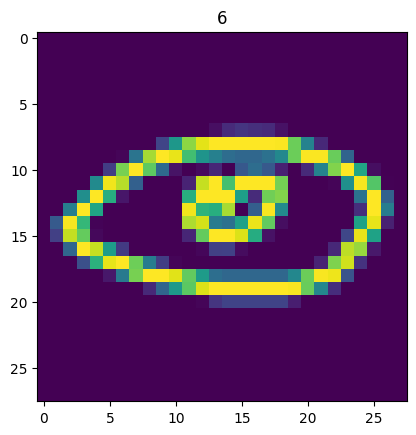

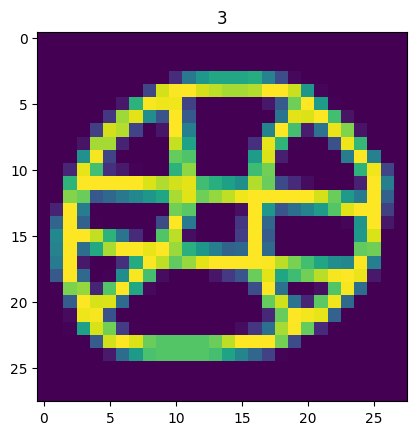

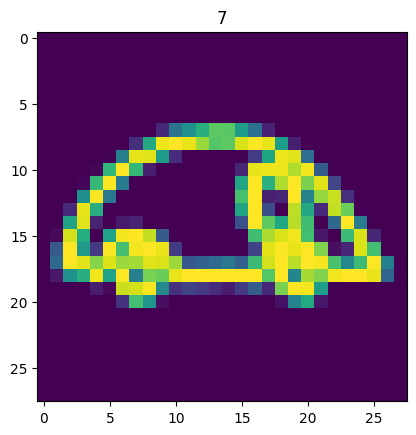

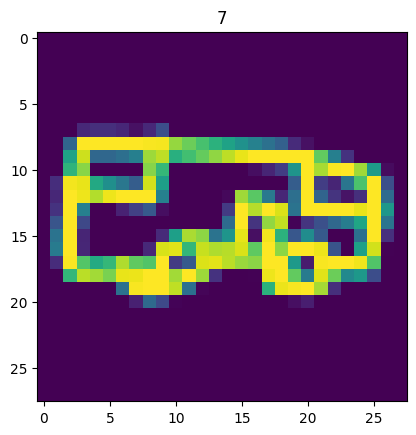

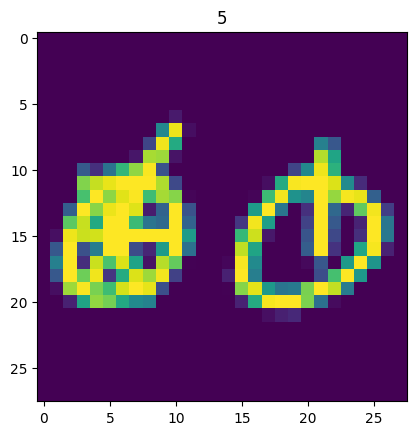

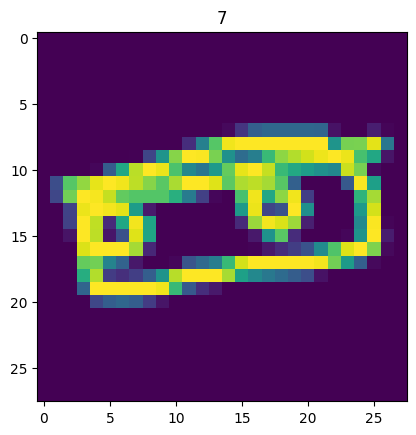

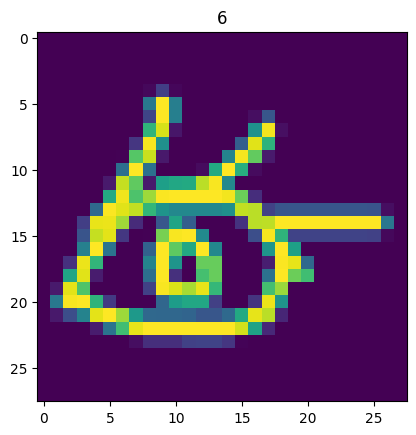

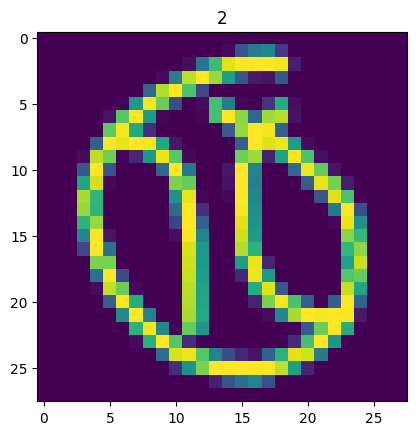

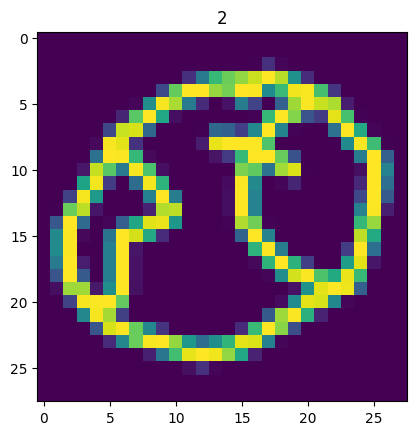

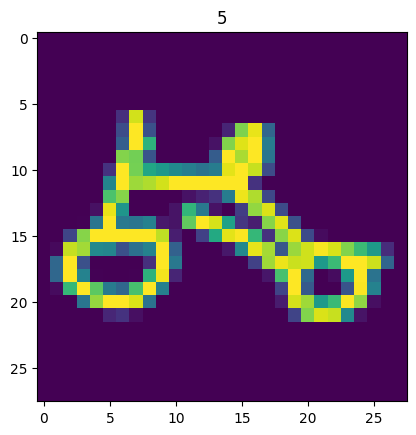

## Correct! 🎉

In [26]:
# TODO: Iterate through train_ds, displaying the image using plt.imshow() and printing the class
# No answer checking here, you'll know you've done it right when you see 10 images with labels!
import matplotlib.pyplot as plt

for idx in range(10):
  data, label = train_ds[idx]
  img = data.reshape(28,28)
  plt.imshow(img)
  plt.title(label)
  plt.show()

check('1.5.2', None)

### Step 3: The `DataLoader` class
Next, we will create a `DataLoader` object. Since deep learning models are typically trained in batches of data points, the `DataLoader` acts as a wrapper over the `Dataset` object and automatically aggregates data points into batches. It also can perform other useful functions like randomly shuffling the data points.

Take a second and read over the PyTorch documentation for DataLoaders to get a sense of the API:

https://pytorch.org/tutorials/beginner/basics/data_tutorial.html

1) Using the `EmojiDataset` class we mentioned above, create three `DataLoader` objects: one for training (call it `train_dataloader`), one for validation (`val_dataloader`), and one for testing (`test_dataloader`). (We've included the code for `train_dataloader`). Set the batch size as a variable `batch_size` to 64 and `shuffle=True`.

In [27]:
# TODO: Create three DataLoader objects
batch_size = 64
train_dataloader = torch.utils.data.DataLoader(train_ds, batch_size=batch_size, shuffle=True)
val_dataloader = torch.utils.data.DataLoader(val_ds, batch_size=batch_size, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_ds, batch_size=batch_size, shuffle=True)

check('1.6.1', [train_dataloader, val_dataloader, test_dataloader])


## Correct! 🎉

### Step 4: The Emoji MLP

Now that we've defined how to load and generate data, let's create an MLP model specifically for the dataset.

Note that there are a vast number of potential architectures that you can possibly choose from! Here, we describe a basic neural network that has two important specifications:

- The number of input features is equal to the number of pixels in a sketch training example (784).
- The number of output features is equal to the number of classes (10).

**TODO**: Define a PyTorch `nn.Module` class (call it `EmojiMLP`) with the following specifications:
- An linear layer with:
 - 784 input features
 - 64 output features
 - Followed by ReLU activation function
- A second linear layer with:
 - 64 input features
 - 32 output features
 - Followed by ReLU activation function
- An output linear layer with:
 - 32 input features
 - 10 output features
 - No activation function


In [28]:
class EmojiMLP(nn.Module):
  def __init__(self):
    super().__init__()
    self.l1 = nn.Linear(784, 64)
    self.l2 = nn.Linear(64, 32)
    self.l3 = nn.Linear(32, 10)
    self.relu = nn.ReLU()

  def forward(self,x):
    x = self.relu(self.l1(x))
    x = self.relu(self.l2(x))
    output = self.l3(x)
    return output

model = EmojiMLP()
check('1.6.2', model)

## Correct! 🎉

# Part 3: Training (~10 min)

### ✅ Data + ✅ Model + ☑️ Training = ✨️ Success!

The last piece of the pie is the training!

However, for this week, we will not be going in detail about the training code 😀 (we will next week!)

Instead, we have provided the training code in the `train()` function in a script, `train.py`. You will simply have to provide the model and data into the `train()` function.



1) Train your model!

Import the `train.py` file and call the `train()` function to train, and the `evaluate()` function to see how your model performs!

We encourage you to take a look at `train.py`. In the left panel, click the folder icon 📁. Navigate to the folder `drive/MyDrive/DLE-Jun23/Projects/Week1`. Open the file `train.py`. The file should appear in the right panel of the notebook.


In [29]:
from Week1.train import *
emoji_model = EmojiMLP()
train(model=emoji_model,
      train_dataloader=train_dataloader,
      val_dataloader=val_dataloader)

accuracy = evaluate(emoji_model, test_dataloader)
print(f"Model accuracy: {accuracy}")
check('1.7.1', accuracy)

Training model...


100%|██████████| 10/10 [00:58<00:00,  5.88s/it]


Finished training successfully!
Evaluating model...
Model accuracy: 0.80215


## Correct! 🎉

4) Play with your trained model

Now all the hard work is paid off! Run the demo below.

In [30]:
from scipy.special import softmax

def get_prediction(doodle):
  pt_input = torch.Tensor(doodle).view(1, doodle.shape[0]*doodle.shape[1])
  y_hats = emoji_model(pt_input).detach().numpy()[0]
  y_hats = softmax(y_hats)
  return y_hats

def predict(doodle):
  if doodle is None:
    return
  doodle = doodle / 255.
  y_hats = get_prediction(doodle)
  emoji_names = np.array(list(DOODLE_TO_EMOJI_MAP.values()))
  emoji_dict = {emoji_names[i]: float(y_hat) for i, y_hat in enumerate(y_hats)}
  return emoji_dict

interface = gr.Interface(predict, inputs='sketchpad', outputs='label', theme="default", live=True, description="Guess the Doodle!")
interface.launch(debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

Keyboard interruption in main thread... closing server.


 🎊Congratulations 🎊!

You've finished the first week 💪.

Head over to the Corise course website and submit your project!